In [28]:
# Import the required library

import tensorflow.contrib.layers as lays
import numpy as np
from skimage import transform
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt 

def autoencoder(inputs):
    # encoder
    # 28 x 28 x 1   ->  14 x 14 x 32
    # 14 x 14 x 32  ->  7 x 7 x 16
    # 7 x 7 x 16    ->  7 x 7 x 8
    net = lays.conv2d(inputs, 32, [5, 5], stride=2, padding='SAME')
    print(net.get_shape())
    net = lays.conv2d(net, 16, [5, 5], stride=2, padding='SAME')
    print(net.get_shape())
    net = lays.conv2d(net, 8, [5, 5], stride=1, padding='SAME')
    print(net.get_shape())
    # decoder
    # 7 x 7 x 8    ->  7 x 7 x 16
    # 7 x 7 x 16   ->  14 x 14 x 32
    # 14 x 14 x 32  ->  28 x 28 x 1
    net = lays.conv2d_transpose(net, 16, [5, 5], stride=1, padding='SAME')
    print(net.get_shape())
    net = lays.conv2d_transpose(net, 32, [5, 5], stride=2, padding='SAME')
    print(net.get_shape())
    net = lays.conv2d_transpose(net, 1, [5, 5], stride=2, padding='SAME', activation_fn=tf.nn.tanh)
    print(net.get_shape())
    return net

ae_inputs = tf.placeholder(tf.float32, (None, 28, 28, 1))  # input to the network (MNIST images)
ae_outputs = autoencoder(ae_inputs)  # create the Autoencoder network

# calculate the loss and optimize the network
loss = tf.reduce_mean(tf.square(ae_outputs - ae_inputs))  # claculate the mean square error loss
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# initialize the network
init = tf.global_variables_initializer()

batch_size = 512  # Number of samples in each batch
epoch_num = 5     # Number of epochs to train the network
lr = 0.001        # Learning rate

(?, 14, 14, 32)
(?, 7, 7, 16)
(?, 7, 7, 8)
(?, 7, 7, 16)
(?, 14, 14, 32)
(?, 28, 28, 1)
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [32]:
!gsutil -m cp gs://di_og/data/mff_20180506_seg1_*_pid.csv ./data/

Copying gs://di_og/data/mff_20180506_seg1_eval_pid.csv...
Copying gs://di_og/data/mff_20180506_seg1_train_pid.csv...
| [2/2 files][  1.1 GiB/  1.1 GiB] 100% Done                                    
Operation completed over 2 objects/1.1 GiB.                                      


In [33]:
import pandas as pd

train = pd.read_csv('data/mff_20180506_seg1_train_pid.csv')

In [34]:
train

,3309A23229B443EC98AF8E20AB337047,-0.036833712584930074,-0.08955733410404573,-0.06838579238994572,-0.16328129209749537,-0.09806721376011057,-0.05856031528281144,-0.009439124165475158,-0.16065488050390658,-0.015597998553200343,...,0.0.167,-0.02188719540976731.5,-0.023354340633180908.5,-0.021486295303614632.5,-0.02160053856394133.5,-0.0095823347674091.5,-0.05358942332771762.5,-0.09623525948180937.5,-0.6305982126998125.4,-0.10249578090944701.5
0,330B87E935BE4049891BC64A63857921,-0.036834,-0.089557,-0.068386,2.611535,-0.098067,-0.058560,-0.009439,-0.160655,-0.015598,...,0.0,-0.021887,-0.023354,-0.021486,-0.021601,-0.009582,-0.053589,-0.096235,-0.630598,-0.102496
1,330DE89D0C634540A62AA299C12F933F,-0.036834,-0.089557,-0.068386,-0.163281,0.053454,-0.058560,-0.009439,-0.160655,-0.015598,...,0.0,-0.021887,-0.023354,-0.021486,-0.021601,-0.009582,-0.053589,-0.096235,-0.630598,-0.102496
2,330DF0EB58B84B61A7035D2BA61D5A48,-0.036834,-0.089557,-0.068386,-0.163281,-0.098067,-0.058560,-0.009439,-0.160655,-0.015598,...,0.0,-0.021887,-0.023354,-0.021486,-0.021601,-0.009582,-0.053589,-0.096235,-0.630598,-0.102496
3,330E15F632CA4ACC882052014EE39D3E,-0.036834,-0.089557,-0.068386,-0.163281,-0.098067,-0.058560,-0.009439,-0.160655,-0.015598,...,0.0,-0.021887,-0.023354,-0.021486,-0.021601,-0.009582,-0.053589,-0.096235,-0.630598,-0.102496
4,330F606DE2864F749726FA87C3919DBC,-0.036834,-0.089557,-0.068386,-0.163281,-0.098067,-0.058560,-0.009439,-0.160655,-0.015598,...,0.0,-0.021887,-0.023354,-0.021486,-0.021601,-0.009582,-0.053589,-0.096235,-0.630598,-0.102496
5,330FB05EB1394991979D94969A1ED073,-0.036834,-0.089557,-0.068386,-0.163281,-0.098067,-0.058560,-0.009439,-0.160655,-0.015598,...,0.0,-0.021887,-0.023354,-0.021486,-0.021601,-0.009582,-0.053589,-0.096235,-0.630598,-0.102496
6,331046684A7844FFBB71485F52DC65EB,-0.036834,-0.089557,-0.068386,-0.163281,-0.098067,-0.058560,-0.009439,-0.160655,-0.015598,...,0.0,-0.021887,-0.023354,-0.021486,-0.021601,-0.009582,-0.053589,-0.096235,-0.630598,-0.102496
7,3310BBC730B2419BB8729650315E8C91,-0.036834,-0.089557,-0.068386,-0.163281,-0.098067,-0.058560,-0.009439,-0.160655,-0.015598,...,0.0,-0.021887,-0.023354,-0.021486,-0.021601,-0.009582,-0.053589,-0.096235,-0.630598,-0.102496
8,331266113A34494B95B11C89F78CEEB5,-0.036834,-0.089557,-0.068386,-0.163281,-0.098067,-0.058560,-0.009439,-0.160655,-0.015598,...,0.0,-0.021887,-0.023354,-0.021486,-0.021601,-0.009582,-0.053589,-0.096235,-0.630598,-0.102496
9,33126A5B6F8D426C9C8012BCB8EB8E05,-0.036834,-0.089557,-0.068386,-0.163281,-0.098067,-0.058560,-0.009439,-0.160655,-0.015598,...,0.0,-0.021887,-0.023354,-0.021486,-0.021601,-0.009582,-0.053589,-0.096235,-0.630598,-0.102496


In [22]:
sess = tf.Session()
sess.run(init)

losses = []
for ep in range(epoch_num):  # epochs loop
    for batch_n in range(batch_per_ep):  # batches loop
        batch_img, batch_label = mnist.train.next_batch(batch_size)  # read a batch
        batch_img = batch_img.reshape((-1, 28, 28, 1))               # reshape each sample to an (28, 28) image
        _, c = sess.run([train_op, loss], feed_dict={ae_inputs: batch_img})
        print('Epoch: {} - cost= {:.5f}'.format((ep + 1), c))
        losses.append(c)

Epoch: 1 - cost= 0.11074
Epoch: 1 - cost= 0.11013
Epoch: 1 - cost= 0.10651
Epoch: 1 - cost= 0.10561
Epoch: 1 - cost= 0.09739
Epoch: 1 - cost= 0.09408
Epoch: 1 - cost= 0.08282
Epoch: 1 - cost= 0.08036
Epoch: 1 - cost= 0.08790
Epoch: 1 - cost= 0.08259
Epoch: 1 - cost= 0.07811
Epoch: 1 - cost= 0.07582
Epoch: 1 - cost= 0.07685
Epoch: 1 - cost= 0.07718
Epoch: 1 - cost= 0.07651
Epoch: 1 - cost= 0.07606
Epoch: 1 - cost= 0.07362
Epoch: 1 - cost= 0.07276
Epoch: 1 - cost= 0.07108
Epoch: 1 - cost= 0.07112
Epoch: 1 - cost= 0.06880
Epoch: 1 - cost= 0.06650
Epoch: 1 - cost= 0.06568
Epoch: 1 - cost= 0.06544
Epoch: 1 - cost= 0.06356
Epoch: 1 - cost= 0.06433
Epoch: 1 - cost= 0.06108
Epoch: 1 - cost= 0.05883
Epoch: 1 - cost= 0.05882
Epoch: 1 - cost= 0.05801
Epoch: 1 - cost= 0.05625
Epoch: 1 - cost= 0.05521
Epoch: 1 - cost= 0.05498
Epoch: 1 - cost= 0.05459
Epoch: 1 - cost= 0.05402
Epoch: 1 - cost= 0.05278
Epoch: 1 - cost= 0.05064
Epoch: 1 - cost= 0.05057
Epoch: 1 - cost= 0.05018
Epoch: 1 - cost= 0.04849


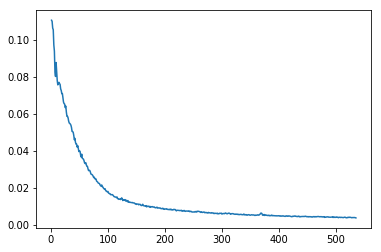

In [23]:
t = []
for i in range(len(losses)):
    t.append((i+1, losses[i]))
    
plt.plot(*zip(*t))
plt.show()

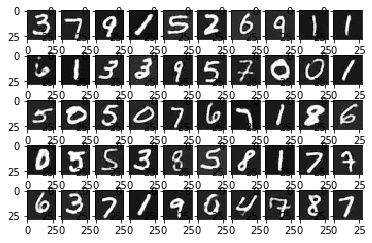

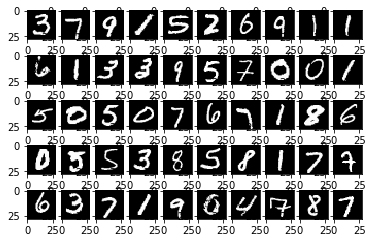

In [26]:
# test the trained network
batch_img, batch_label = mnist.test.next_batch(50)
batch_img = batch_img.reshape((-1, 28, 28, 1))      
recon_img = sess.run([ae_outputs], feed_dict={ae_inputs: batch_img})[0]

# plot the reconstructed images and their ground truths (inputs)
plt.figure(1)
plt.title('Reconstructed Images')
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(recon_img[i, ..., 0], cmap='gray')
plt.figure(2)
plt.title('Input Images with Gaussian Noise')
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(batch_img[i, ..., 0], cmap='gray')
plt.show()

In [50]:
sess.close()